In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import re

<a id='wrangling'></a>
## Data Wrangling

> 
### Loading the data

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
dataset=pd.read_csv("no-show_dataset.csv")
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From above we can see that there are no Null values or missing values therefore we move to the next step

In [6]:
dataset.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# Create a summary of the data.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
max(dataset['Age'])

115

In [9]:
min(dataset['Age'])

-1

Min is -1 therefore we will remove the row which contains that and max age is 115 which is not a big issue and we will deal with it later

In [10]:
l=[]
for i in range(len(dataset['Age'])):
    if(dataset['Age'][i]<0):
        l.append(i)

In [11]:
l

[99832]

In [12]:
dataset['Age'][99832]=1

C:\Users\Aswin P T\AppData\Local\Temp\ipykernel_4364\201583174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Age'][99832]=1


Minimum age in the dataset is negative(something to be taken care of) and max age is above 100.

### Variable Identification
* Identifying the target variable(dependent variable) and the predictor variables(independent variables) which affect the status of the target variable.

The target variable(y) is the no_show column of the dataset and predictor variable(X) are the columns 3rd to second last from the dataset

In [13]:
y=dataset.iloc[:,13]
y

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [14]:
X=dataset.iloc[:,:-1]
X

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1


### Type of Variable Classified:
#### Predictor Variables: no_show

<br>

#### Target Variable (Independent Variable): PatientId,	AppointmentID, Gender	,ScheduledDay,	AppointmentDay,	Age,	Neighbourhood,	Scholarship,	Hipertension,	Diabetes,	Alcoholism,	Handcap,	SMS_received

<br>

### Classify the features based on dataype

In [15]:
# Check the data types of each column (features)
X.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
dtype: object

In [16]:
y.dtypes

dtype('O')

### Write the features categorized by data types here:
### Data Types
PatientId-         float64<br/>
AppointmentID-       int64<br/>
Gender-            object<br/>
ScheduledDay-      object<br/>
AppointmentDay-    object<br/>
Age-                int64<br/>
Neighbourhood-     object<br/>
Scholarship-        int64<br/>
Hipertension-       int64<br/>
Diabetes-           int64<br/>
Alcoholism-         int64<br/>
Handcap-            int64<br/>
SMS_received-       int64<br/>
<br>
y  object

### Checking for missing data

In [17]:
X.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
dtype: int64

Are there any missing data? _(Answer here)_

no

#### Check the counts of some categorical variables and give your inference

In [18]:
l=[]
for i in dataset['Neighbourhood']:
    if i not in l:
        l.append(i)
len(l)

81

In the case of genders and no_show we have only two categories so we label encoded them to 0s and 1s
<br/>
and in case of Neighbourhood we have 81 different categories 

<a id='cleaning'></a>
## Data Cleaning

In [19]:
dataset['sDate']=dataset['ScheduledDay'].str.extract('(\d\d)?T').astype(int)
dataset['sMonth']=dataset['ScheduledDay'].str.extract('(\d\d)?-..T').astype(int)
dataset[:20]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No,27,4
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,27,4
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,27,4
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,29,4
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,27,4


In [20]:
dataset['sWeekday']=dataset['ScheduledDay'].str.extract('(\d\d\d\d-\d\d-\d\d)?T')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,2016-04-29
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,2016-04-29
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,2016-04-29
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,2016-04-29
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,2016-04-29


In [21]:
for i in range(len(dataset['sWeekday'])):
    dataset['sWeekday'][i]=pd.Timestamp(dataset['sWeekday'][i]).dayofweek

C:\Users\Aswin P T\AppData\Local\Temp\ipykernel_4364\1468437154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sWeekday'][i]=pd.Timestamp(dataset['sWeekday'][i]).dayofweek


In [22]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4


* Some of the spellings of the columns are incorrect.
* Correcting them will make it easier for the users to follow.

we found that handicap and hypertension are mis-spelt as handcap and hipertension so we change that

In [23]:
dataset.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)

In [24]:
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,sDate,sMonth,sWeekday
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4


### Check the unique values for each column.


In [25]:
uniqueValues = dataset. nunique()
uniqueValues

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
sDate                 31
sMonth                 8
sWeekday               6
dtype: int64

### Feature Selection




In [26]:
X=dataset.drop(['ScheduledDay', 'PatientId','AppointmentID','AppointmentDay','No-show'], axis=1)
X.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,sDate,sMonth,sWeekday
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,29,4,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,29,4,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,29,4,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,29,4,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,29,4,4


In [27]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X=X.values
X[:,0]=labelencoder.fit_transform(X[:,0])
X[:,2]=labelencoder.fit_transform(X[:,2])
X

array([[0, 62, 39, ..., 29, 4, 4],
       [1, 56, 39, ..., 29, 4, 4],
       [0, 62, 45, ..., 29, 4, 4],
       ...,
       [0, 21, 43, ..., 27, 4, 2],
       [0, 38, 43, ..., 27, 4, 2],
       [0, 54, 43, ..., 27, 4, 2]], dtype=object)

In [28]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,62,39,0,1,0,0,0,0,29,4,4
1,1,56,39,0,0,0,0,0,0,29,4,4
2,0,62,45,0,0,0,0,0,0,29,4,4
3,0,8,54,0,0,0,0,0,0,29,4,4
4,0,56,39,0,1,1,0,0,0,29,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1,3,5,1
110523,0,51,43,0,0,0,0,0,1,3,5,1
110524,0,21,43,0,0,0,0,0,1,27,4,2
110525,0,38,43,0,0,0,0,0,1,27,4,2


In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y=pd.DataFrame(y)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

    Specs        Score
1       1  5790.753606
9       9  1468.135389
8       8  1199.572650
10     10   303.779312
4       4   113.087858
2       2   106.343267
3       3    84.601489
5       5    23.638502
7       7     4.786466
11     11     4.110322
0       0     1.218632
6       6     0.004119


The columns alcoholism,gender,day of week and handi cap show very less variation on the dependent variable.

In [30]:
y=y.values
y=labelencoder.fit_transform(y)

C:\Users\Aswin P T\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
import seaborn as sns

In [33]:
dataset=dataset.drop(['ScheduledDay', 'PatientId','AppointmentID','AppointmentDay'], axis=1)
dataset=dataset.values
dataset[:,0]=labelencoder.fit_transform(dataset[:,0])
dataset[:,2]=labelencoder.fit_transform(dataset[:,2])
dataset[:,9]=labelencoder.fit_transform(dataset[:,9])

In [34]:
dataset=pd.DataFrame(dataset)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,62,39,0,1,0,0,0,0,0,29,4,4
1,1,56,39,0,0,0,0,0,0,0,29,4,4
2,0,62,45,0,0,0,0,0,0,0,29,4,4
3,0,8,54,0,0,0,0,0,0,0,29,4,4
4,0,56,39,0,1,1,0,0,0,0,29,4,4


In [35]:
dataset=dataset.astype(int)

# Univariate plots

C:\Users\Aswin P T\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

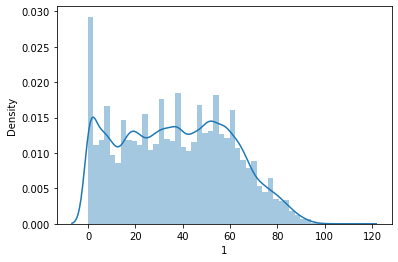

In [36]:
#Age
sns.distplot(dataset[1])

We can see that most of the patients are of the age group 0-60.<br/>As the age increases the patients of that category are seen less.

C:\Users\Aswin P T\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

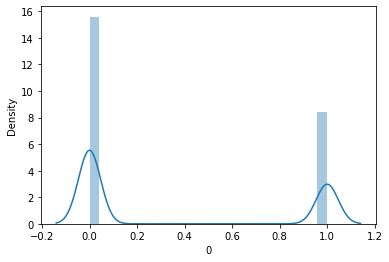

In [37]:
#Gender
sns.distplot(dataset[0])

Looking at the graph above we can see that the frequency of Female is greater than the Male patients

# Bivariate plots

Text(0.5, 1.0, 'Scatter plot of Age vs Date of month')

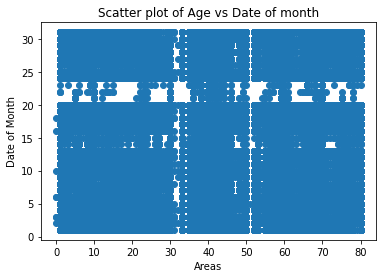

In [38]:
#Age vs Date of month
plt.scatter(x=dataset[2],y=dataset[10])
plt.xlabel('Areas')
plt.ylabel('Date of Month')
plt.title('Scatter plot of Age vs Date of month')

From above we observe two things<br/>The dates around 20-25 have lesser appointments than the other days.<br/>And second the people in area around 31-33 and 51/52 also have comparatively lesser appointments.

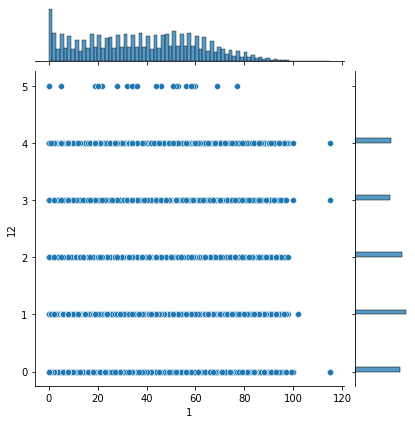

In [39]:
sns.jointplot(x=dataset[1],y=dataset[12])

Looking at the graph above we can see that there are no appointments on sunday which could mean that the clinic is closed on that day.

We also see that there are few people on saturday.

And the highest frequency of people is seen on Monday, Tuesday and Wednesday.

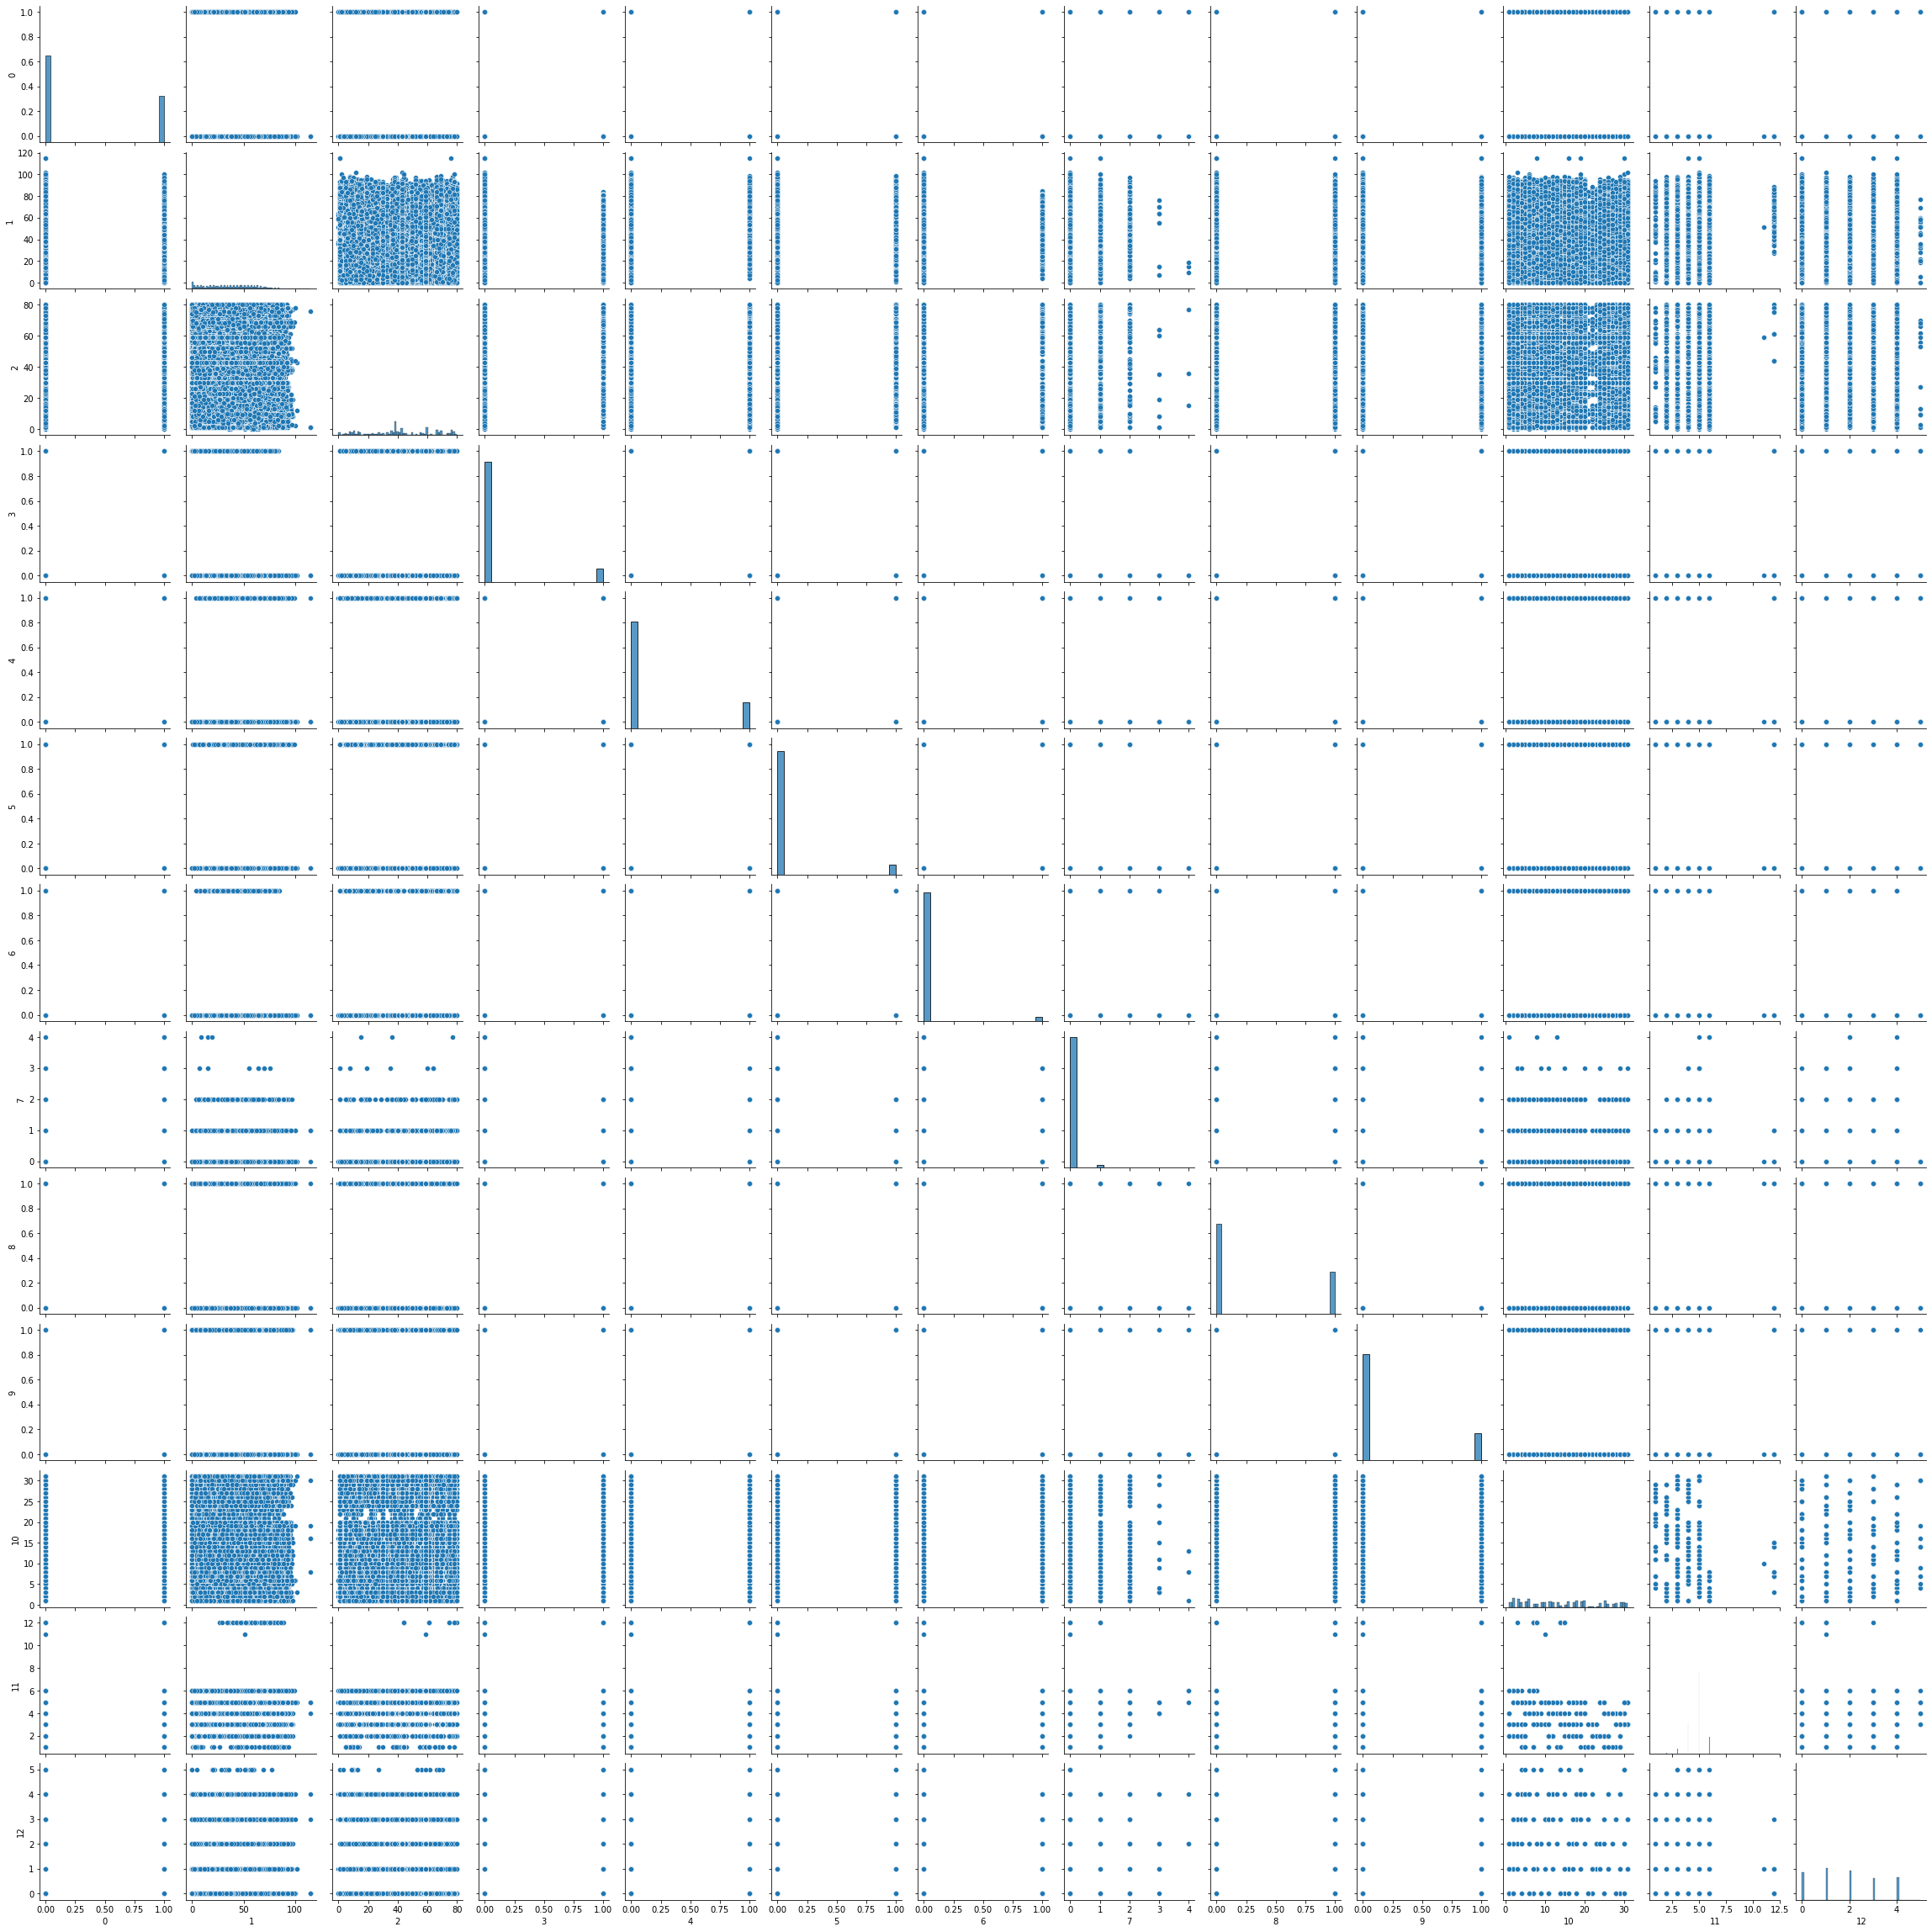

In [40]:
sns.pairplot(dataset)

<AxesSubplot:>

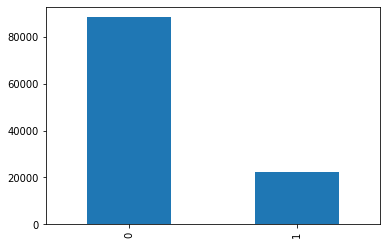

In [41]:
#Bar graph of No-show
dataset[9].value_counts().plot.bar()

We can see that around 85000 people are No-show and around 25000 are Show.

<AxesSubplot:>

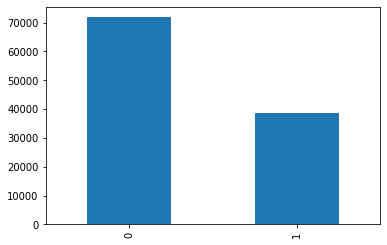

In [42]:
#Bar graph of Gender
dataset[0].value_counts().plot.bar()

0 here corresponds to Male so we can see that there are more male patients that the female(1)

<AxesSubplot:>

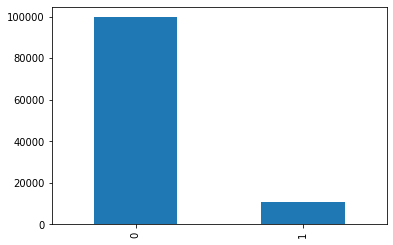

In [43]:
dataset[3].value_counts().plot.bar()

This graph above is of scholarship. We have more people without scholarship and a few with scholarship.

<AxesSubplot:>

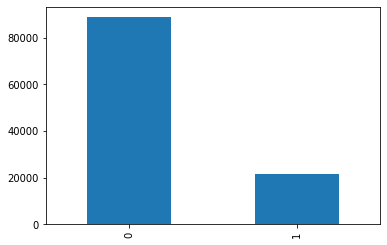

In [44]:
dataset[4].value_counts().plot.bar()

The above graph is of Hypertension. we can see that there are fewer patients with Hypertension.

<AxesSubplot:>

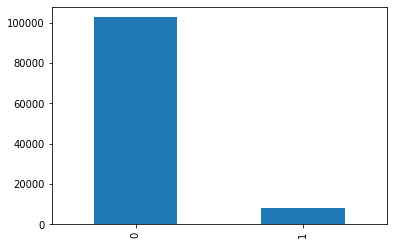

In [45]:
dataset[5].value_counts().plot.bar()

So this graph is about people with diabetes. fewer patients have diabetes.

<AxesSubplot:>

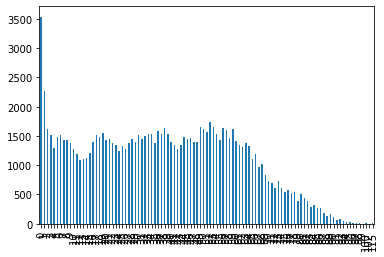

In [46]:
dataset[1].value_counts().sort_index().plot.bar()

people of age 0-60 have higher appointments than those with age higher than that.

<AxesSubplot:>

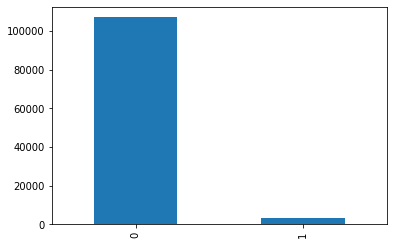

In [47]:
dataset[6].value_counts().plot.bar()

Very few people with alcoholism.

<AxesSubplot:>

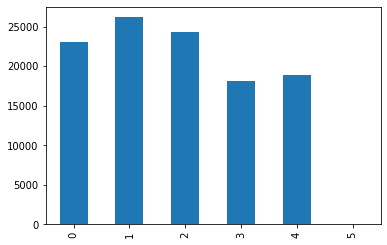

In [48]:
dataset[12].value_counts().sort_index().plot.bar()

very few appointments on saturday and no appointments on Sunday.

# Feature selection

In [49]:
X=X.drop([0,6,7,11], axis=1)
X.head()

,1,2,3,4,5,8,9,10
0,62,39,0,1,0,0,29,4
1,56,39,0,0,0,0,29,4
2,62,45,0,0,0,0,29,4
3,8,54,0,0,0,0,29,4
4,56,39,0,1,1,0,29,4


In [50]:
X.rename(columns={1:'Age',2:'Neighbourhood'},inplace=True)

In [51]:
X.rename(columns={3:'Scholarship',4:'Hypertension',5:'Diabetes',8:'Handicap',9:'Date',10:'DayofWeek'},inplace=True)

In [52]:
X=X.astype(int)
X.head()

,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Handicap,Date,DayofWeek
0,62,39,0,1,0,0,29,4
1,56,39,0,0,0,0,29,4
2,62,45,0,0,0,0,29,4
3,8,54,0,0,0,0,29,4
4,56,39,0,1,1,0,29,4


In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12529)

In [54]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.3,random_state=12529)

FEATURE SCALING

In [55]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X_train3=sc_X.fit_transform(X_train3)
X_test3=sc_X.transform(X_test3)

TRAINING LOGISTIC REGRESSION MODEL

In [56]:
from sklearn.linear_model import LogisticRegression
classifier1=LogisticRegression(random_state = 12529)
classifier1.fit(X_train,y_train)

LogisticRegression(random_state=12529)

In [57]:
classifier2=LogisticRegression(random_state = 12529)
classifier2.fit(X_train3,y_train3)

LogisticRegression(random_state=12529)

In [58]:
y_pred1=classifier1.predict(X_test)

In [59]:
y_pred2=classifier2.predict(X_test3)

TRAINING DECISIUON TREE CLASSIFIER MODEL

In [60]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 12529)
classifier_dt1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=12529)

In [61]:
classifier_dt2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 12529)
classifier_dt2.fit(X_train3, y_train3)

DecisionTreeClassifier(criterion='entropy', random_state=12529)

In [62]:
dec_pred1=classifier_dt1.predict(X_test)

In [63]:
dec_pred2=classifier_dt2.predict(X_test3)

TESTING THE ACCURACY AND COMPARING THE TWO MODELS ACCORDING TO THEIR TEST SIZES

CONFUSION MATRIX

In [64]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Log Reg for train:test at 80:20 \n",cm1)

cm2 = confusion_matrix(y_test, y_pred1)
print("Log Reg for train:test at 70:30 \n",cm2)

cm3 = confusion_matrix(y_test, dec_pred1)
print("Dec tree Clf for train:test at 80:20 \n",cm3)

cm4 = confusion_matrix(y_test3, dec_pred2)
print("Dec Tree Clf for train:test at 70:30 \n",cm4)

Log Reg for train:test at 80:20 
 [[17634    50]
 [ 4394    28]]
Log Reg for train:test at 70:30 
 [[17634    50]
 [ 4394    28]]
Dec tree Clf for train:test at 80:20 
 [[14762  2922]
 [ 3191  1231]]
Dec Tree Clf for train:test at 70:30 
 [[21917  4651]
 [ 4811  1780]]


In [65]:
x1=(cm1[0][0]+cm1[1][1])/np.sum(cm1)
x2=(cm2[0][0]+cm2[1][1])/np.sum(cm2)
x3=(cm3[0][0]+cm3[1][1])/np.sum(cm3)
x4=(cm4[0][0]+cm4[1][1])/np.sum(cm4)
print("Accuracy of Logistic regression with 80:20 train test split is ",x1)
print("Accuracy of Decision Tree regression with 80:20 train test split is ",x2)
print("Accuracy of Logistic regression with 70:30 train test split is ",x3)
print("Accuracy of Decision Tree regression with 70:30 train test split is ",x4)

Accuracy of Logistic regression with 80:20 train test split is  0.7989686058083778
Accuracy of Decision Tree regression with 80:20 train test split is  0.7989686058083778
Accuracy of Logistic regression with 70:30 train test split is  0.7234687415181399
Accuracy of Decision Tree regression with 70:30 train test split is  0.7146476069845291


COMPARISON OF SCORES:

1. From the above scores we can see that in the 80:20 and 70:30 train test split there is not much diffrence among the 2 models.

2. However Logistic Regression proves to be slightly better than the decision tree classifier 